## Import Libraries

In [3]:
import re # for regular expressions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools # ability to provide complex iterator tools

In [4]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [5]:
nltk.download("words")
nltk.download("stopwords")

[nltk_data] Downloading package words to
[nltk_data]     /Users/diedrebrown/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/diedrebrown/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [71]:
import sklearn
sklearn.__version__>="0.20"
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [7]:
import string
import spacy
#spacy_en = spacy.load("en_core_web_sm")

In [8]:
from spacy.lang.en import English
nlp = English() # use directly

In [9]:
%matplotlib inline
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'
# Set the default style
plt.style.use("seaborn")

In [10]:
# Raise an exception, warn, or no action if trying to use chained assignment, 
# The default is warn [default: warn] [currently: warn]
pd.set_option('mode.chained_assignment', None)

In [11]:
# import the logging library to expose the interface that the application code directly uses.
import logging
# logging levels
# CRITICAL (50) - A serious error, indicating that the program itself may be unable to continue running.
# ERROR (40) - Due to a more serious problem, the software has not been able to perform some function.
# WARNING (30) - An indication that something unexpected happened, or indicative of some problem in the near future (e.g. 'disk space low'). The software is still working as expected.
# INFO (20) - Confirmation that things are working as expected.
# DEBUG (10) - Detailed information, typically of interest only when diagnosing problems.
# NOTSET (0) - 

In [12]:
logFormatter = '%(asctime)s - %(levelname)s - %(message)s' # logging formatted as time, level name, and message
logging.basicConfig(format=logFormatter, level=logging.INFO) # sets the default logging level, and the log formatting
logger = logging.getLogger(__name__) # 
# run first log
logger.info("initial log")

2020-11-23 14:42:40,059 - INFO - initial log


# 2017 Alexa Reviews

## Load 2017 Corpus Data

In [13]:
o_corpus = pd.read_csv("original_datasets/Amazon_Echo_2_Reviews.csv")

In [14]:
o_corpus.head()

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,10/3/2017,NaN,Echo Dot,3,NaN
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,9/26/2017,NaN,Echo Dot,4,NaN
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,9/8/2017,NaN,Echo Dot,5,NaN
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,10/19/2017,NaN,Echo Dot,5,NaN
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN


## Data Cleaning and Exploratory Data Analysis of 2017 Corpus Data
Prior exploratory analysis of this csv file looked at the review color, data, and ratings. This analysis is concerned with the Title and Review Text, we will use simplified dataframe with only necessary fields.

In [15]:
w_corpus = o_corpus[['Title', 'Review Text', 'Review Date', 'Rating']]
w_corpus.columns = ['title', 'review', 'date', 'rating']
w_corpus.head()

,title,review,date,rating
0,Three Stars,Not great speakers,10/3/2017,3
1,Four Stars,Great little gagit,9/26/2017,4
2,Awesome!,Awesome 👏🏽,9/8/2017,5
3,Five Stars,Love my Echo,10/19/2017,5
4,Five Stars,Great device,9/17/2017,5


In [16]:
w_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6855 non-null   object
 1   review  6852 non-null   object
 2   date    6855 non-null   object
 3   rating  6855 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 214.3+ KB


From prior exploratory analysis, we knew that there were three blank reviews. We eliminated those rows from analysis as they were less than 1% of the total data. We will do that here as well. 

We should also convert the date column to a date format datatype and extract the year and mm-dd for consistency.

In [22]:
# drop NA reviews
w_corpus.dropna(axis=0, subset=["review"], inplace=True)
w_corpus.info()
        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6852 entries, 0 to 6854
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       6852 non-null   object        
 1   review      6852 non-null   object        
 2   date        6852 non-null   datetime64[ns]
 3   rating      6852 non-null   int64         
 4   year        6852 non-null   int64         
 5   mm-dd       6852 non-null   object        
 6   positivity  6852 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 428.2+ KB


In [18]:
# convert date datatype
w_corpus['date'] = pd.to_datetime(w_corpus['date'])

# extract year and mm-dd
w_corpus['year'] = w_corpus['date'].dt.year
w_corpus['mm-dd'] = w_corpus['date'].dt.strftime('%m-%d')

w_corpus.head()

,title,review,date,rating,year,mm-dd
0,Three Stars,Not great speakers,2017-10-03,3,2017,10-03
1,Four Stars,Great little gagit,2017-09-26,4,2017,09-26
2,Awesome!,Awesome 👏🏽,2017-09-08,5,2017,09-08
3,Five Stars,Love my Echo,2017-10-19,5,2017,10-19
4,Five Stars,Great device,2017-09-17,5,2017,09-17


### Things to think about:
- We know that the ratings are ranked from 1 to 5. This means that 3 is a neutral rating and could be eliminated. However, even though the majority of the ratings skewed to 5, eliminating the neutral ratings could further skew our data to the positive 5 side. We will try the analysis keeping the neutral ratings. 
- Positivity Encoding. As we know that anything with a rating of 3 to 5 is positive and less than 3 is negative, we can create a column to encode for that.
- We should use describe to briefly see the uniqueness of the messages.
- Our corpus contains 6852 documents. In order to perform machine learning these will need to be converted into numerical feature vectors.

In [19]:
# positive rating encoding
w_corpus['positivity'] = np.where(w_corpus['rating']>=3, 1, 0)
w_corpus.head()

,title,review,date,rating,year,mm-dd,positivity
0,Three Stars,Not great speakers,2017-10-03,3,2017,10-03,1
1,Four Stars,Great little gagit,2017-09-26,4,2017,09-26,1
2,Awesome!,Awesome 👏🏽,2017-09-08,5,2017,09-08,1
3,Five Stars,Love my Echo,2017-10-19,5,2017,10-19,1
4,Five Stars,Great device,2017-09-17,5,2017,09-17,1


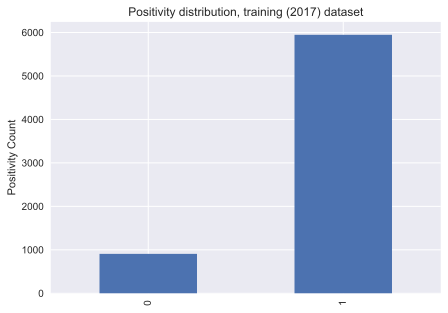

In [20]:
fig = plt.figure(figsize=(7,5))
w_corpus['positivity'].value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Positivity Count")
plt.title("Positivity distribution, training (2017) dataset")
plt.savefig('img/2017-positivity_distribution.png', dpi=100)
plt.show()

In [26]:
# general look by rating statistics
w_corpus.describe()

,rating,year,positivity
count,6852.000000,6852.0,6852.000000
mean,4.206801,2017.0,0.867776
std,1.272755,0.0,0.338759
min,1.000000,2017.0,0.000000
25%,4.000000,2017.0,1.000000
50%,5.000000,2017.0,1.000000
75%,5.000000,2017.0,1.000000
max,5.000000,2017.0,1.000000


In [29]:
# general look grouped by positivity encoding
w_corpus.groupby('positivity').describe()

rating                                                 year  \
             count      mean       std  min  25%  50%  75%  max   count   
positivity                                                                
0            906.0  1.384106  0.486652  1.0  1.0  1.0  2.0  2.0   906.0   
1           5946.0  4.636899  0.656861  3.0  4.0  5.0  5.0  5.0  5946.0   

                                                                 
              mean  std     min     25%     50%     75%     max  
positivity                                                       
0           2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0  
1           2017.0  0.0  2017.0  2017.0  2017.0  2017.0  2017.0

Though we knew that most of the ratings were positive from previous analysis, we see now that the mean of positive ratings and reviews is even higher than the average of all the ratings.

In [30]:
# let's see the length of the reviews
w_corpus['length'] = w_corpus['review'].apply(len)
w_corpus.head()

,title,review,date,rating,year,mm-dd,positivity,length
0,Three Stars,Not great speakers,2017-10-03,3,2017,10-03,1,18
1,Four Stars,Great little gagit,2017-09-26,4,2017,09-26,1,18
2,Awesome!,Awesome 👏🏽,2017-09-08,5,2017,09-08,1,10
3,Five Stars,Love my Echo,2017-10-19,5,2017,10-19,1,12
4,Five Stars,Great device,2017-09-17,5,2017,09-17,1,12


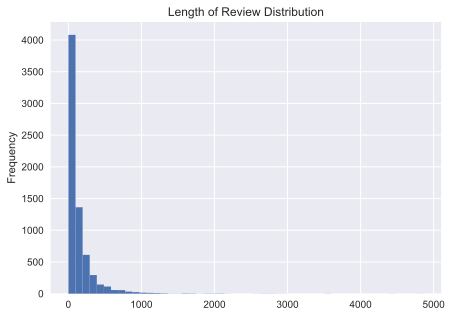

In [34]:
# let's plot the distribution of the message length
fig = plt.figure(figsize=(7,5))
w_corpus['length'].plot.hist(bins=50)
plt.title("Length of Review Distribution")
plt.savefig('img/2017-reviewlength_distribution.png', dpi=100)
plt.show()

Most of the reviews were under 200 characters in length.

In [35]:
w_corpus['length'].describe()

count    6852.000000
mean      142.902656
std       235.040117
min         1.000000
25%        30.000000
50%        73.000000
75%       167.000000
max      4860.000000
Name: length, dtype: float64

The longest review was 4860 characters. Let's take a look at this outlier.

In [36]:
w_corpus[w_corpus['length']==4860]

,title,review,date,rating,year,mm-dd,positivity,length
5960,Alexa in every room,The Amazon Echo Dot brings Alexa to every room...,2017-09-05,4,2017,09-05,1,4860


In [37]:
w_corpus[w_corpus['length']==4860]['review'].iloc[0]

'The Amazon Echo Dot brings Alexa to every room in your home.  The Echo Dot is an excellent addition to the Alexa enabled family, the original Echo, the wireless Tap, the small Dot, the new video enabled Show, and the Amazon Fire devices.Echo - http://amzn.to/2wCwxUuDot - http://amzn.to/2wCQMl0Show - http://amzn.to/2w3qWCZTap - http://amzn.to/2wCbn8UI received my first Echo Dot at the AWS ReInvent conference.  About the size of a hockey puck, I opened it up and set it up in my hotel room.  I was already familiar with Alexa as I owned an Echo and Echo Tap.  Now I had an Echo that would fit in my backpack.  I had wanted a device that I could connect to my home theater and make it smart, to play music and enable automation.  Echo Dot fit the bill.  I wanted to share Echo with others, who were unlikely to buy it themselves but the original Echo and Echo Tap were too expensive.  Again, the Echo Dot made it easy to share my enjoyment of Echo.  I immediately ordered a six pack of Echo Dot\'s.

This review is very long and it seems like it might have been paid for as the user's descriptions of their use of multiple Echo dots in their house and they included numerous links to Amazon products. However, as all the users of this dataset were verified, there's not enough data for us to prove our suspicions.

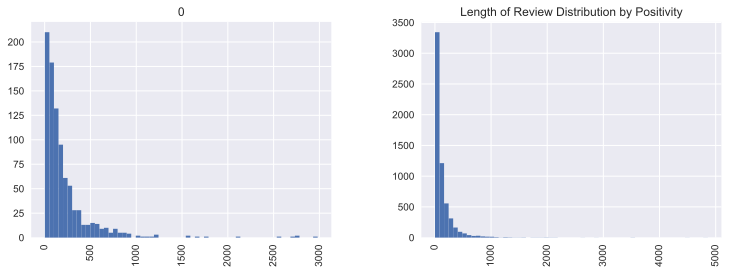

In [40]:
# Let's see if review length can distinguish 
# positive reviews from negative ones
w_corpus.hist(column='length', by='positivity', bins=60, figsize=(12,4))
plt.title("Length of Review Distribution by Positivity")
plt.savefig('img/2017-reviewlengthposit_distribution.png', dpi=100)
plt.show()

As the majority of both positive and negative reviews are under 500, length of review does not seem to be a good distinquishing feature. 

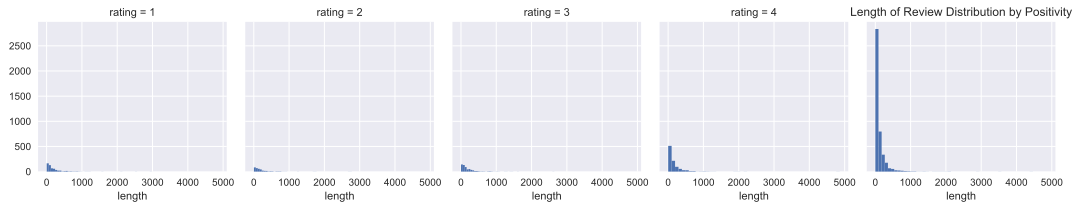

In [42]:
# Let's see if review length changes based on rating
g = sns.FacetGrid(w_corpus, col='rating')
g.map(plt.hist, 'length', bins=50)
plt.title("Length of Review Distribution by Positivity")
plt.savefig('img/2017-reviewlengthrating_distribution.png', dpi=100)
plt.show()

Again, as the majority of reviews are under 500 for all rating ranks, length of review does not seem to be a good distinquishing feature.

In [47]:
# Let's look for correlations between numerical features
ratings = w_corpus.groupby('rating').mean()
# we can drop the year
ratings.drop(['year'], axis=1, inplace=True)
ratings

,positivity,length
rating,,
1,0.0,210.587814
2,0.0,220.905172
3,1.0,202.526050
4,1.0,166.102167
5,1.0,114.863076


In [48]:
ratings.corr()

,positivity,length
positivity,1.000000,-0.690086
length,-0.690086,1.000000


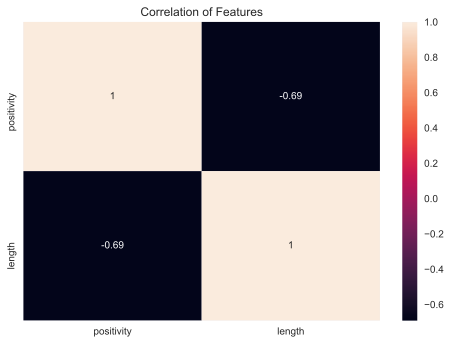

In [50]:
sns.heatmap(ratings.corr(),annot=True)
plt.title("Correlation of Features")
plt.savefig('img/2017-corrfeatures.png', dpi=100)
plt.show()

There's a negative correlation between positivity of review to length.

## Classification of 2017 Alexa Reviews

In [51]:
# Create two objects X and y. X will be the 'review' column of w_corpus 
# and y will be the 'rating' column.
X = w_corpus['review']
y = w_corpus['rating']

In [52]:
# make a count vectorizer object
cv = CountVectorizer()

In [53]:
# use fit_transform on CountVectorizer and pass in X
X = cv.fit_transform(X)


## Train Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3, random_state=101)

## Train a Model

In [56]:
# create an instance of the Naive Bayes estimator
nb = MultinomialNB()

In [57]:
# fit nb using the training data
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

In [58]:
# use the predict method off of nb to predict labels from X_test
predictions = nb.predict(X_test)

In [61]:
# create a confusion matrix and classification report 
# using these predictions and y_test
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  68    2   26   14   57]
 [  18    8   18   15   46]
 [  13    2   34   39   86]
 [   7    0   16   58  202]
 [   7    2    6   21 1291]]


              precision    recall  f1-score   support

           1       0.60      0.41      0.49       167
           2       0.57      0.08      0.13       105
           3       0.34      0.20      0.25       174
           4       0.39      0.20      0.27       283
           5       0.77      0.97      0.86      1327

    accuracy                           0.71      2056
   macro avg       0.54      0.37      0.40      2056
weighted avg       0.66      0.71      0.66      2056



Because we included all ratings our accuracy is only 71%. But, judging from these figures, our accuracy might be improved by only including 1 and 5 star ratings.

## Classificaiton of 2017 Alexa Reviews with only 1 and 5 star ratings

In [62]:
w_corp_filt = w_corpus[(w_corpus['rating']==1) | (w_corpus['rating']==5)]

In [63]:
w_corp_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 2 to 6853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       4940 non-null   object        
 1   review      4940 non-null   object        
 2   date        4940 non-null   datetime64[ns]
 3   rating      4940 non-null   int64         
 4   year        4940 non-null   int64         
 5   mm-dd       4940 non-null   object        
 6   positivity  4940 non-null   int64         
 7   length      4940 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 347.3+ KB


In [64]:
# Create two objects X and y. X will be the 'review' column of w_corpus 
# and y will be the 'rating' column.
X = w_corp_filt['review']
y = w_corp_filt['rating']

In [65]:
# use fit_transform on CountVectorizer and pass in X
X = cv.fit_transform(X)

## Test Train Split on w_corp_filt

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3, random_state=101)

## Train the Model for w_corp_filt

In [67]:
# create an instance of the Naive Bayes estimator
nb = MultinomialNB()

In [68]:
# fit nb using the training data
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations for w_corp_filt

In [69]:
# use the predict method off of nb to predict labels from X_test
predictions = nb.predict(X_test)

In [70]:
# create a confusion matrix and classification report 
# using these predictions and y_test
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 101   54]
 [  15 1312]]


              precision    recall  f1-score   support

           1       0.87      0.65      0.75       155
           5       0.96      0.99      0.97      1327

    accuracy                           0.95      1482
   macro avg       0.92      0.82      0.86      1482
weighted avg       0.95      0.95      0.95      1482



Our accuracy increased to 95% by dropping the middle star values based on the text reviews. Let's see what happens if we include TF-IDF to the process via a pipeline.

## Using Text Processing on w_corp_filt

Create a pipeline with these steps:
- CountVectorizer() for text classification
- TfidfTransformer() to count the number of times a word occurs
- MultinomialNB() to predict the tag of a text based on the probability of each tag for a given text and then outputing the tag with the highest one.

In [72]:
pipe = Pipeline([('tclass', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [73]:
# Redo the train test split on the w_corp_filt because we overwrote 
# X earlier
X = w_corp_filt['review']
y = w_corp_filt['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                test_size=0.3, random_state=101)

Now we'll fit the pipelien to the training data that we re-created. We could not use the original as it had already been vectorized.

In [74]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tclass', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [75]:
new_pred = pipe.predict(X_test)

In [76]:
# create a confusion matrix and classification report 
# using these predictions and y_test
print(confusion_matrix(y_test, new_pred))
print('\n')
print(classification_report(y_test, new_pred))

[[   3  152]
 [   0 1327]]


              precision    recall  f1-score   support

           1       1.00      0.02      0.04       155
           5       0.90      1.00      0.95      1327

    accuracy                           0.90      1482
   macro avg       0.95      0.51      0.49      1482
weighted avg       0.91      0.90      0.85      1482



It looks like Tf-Idf decreased our accuracy. We could try altering the pipeline or using a different model. But using a different library like spacy may actually prove more useful.